# Метод ближайших соседей (KNN)

Идея - найти ближайшие образцы в N-мерном простанстве признаков. Классификация - большинство классов из ближайших соседей, регрессия - среднее по соседям

## Определение ближайших соседей

In [1]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [2]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

## Классификация

На наборе данных с откзаами квадрокоптера

Импорт и предобработка данных

In [3]:
import pandas as pd

data=pd.read_csv("FDIR_dataset_training.csv")
data.head()

,voltage,velocity,current,initial velocity,initial current,nomimal velocity,nominal current,status_fault_force,status_fault_voltage,status_fault_L,status_fault_R,status_fault_km,status_fault_J,status_fault_ke,status_fault_kf,status_fault_w
0,12.00000,24.000000,9.600000,2,-1.490130,24.000000,9.600000,0,0,0,0,0,1,0,0,0
1,4.93437,-0.299136,0.254281,3,-0.384627,-0.299136,0.254281,0,0,0,0,0,0,0,0,0
2,12.00000,22.830600,9.498980,1,1.940950,22.830600,9.498980,0,0,0,0,0,0,0,0,0
3,-12.00000,-23.572900,-9.579980,2,-1.728210,-23.572900,-9.579980,0,0,0,0,0,0,0,0,0
4,-5.00000,-10.000000,-4.000000,1,1.848640,-10.000000,-4.000000,0,0,0,0,0,0,0,0,0


In [4]:
data.drop(['status_fault_voltage', 'status_fault_L' , 'status_fault_R', 'status_fault_km', 'status_fault_J', 'status_fault_ke', 'status_fault_kf', 'status_fault_w'], axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95131 entries, 0 to 95130
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   voltage             95131 non-null  float64
 1   velocity            95131 non-null  float64
 2   current             95131 non-null  float64
 3   initial velocity    95131 non-null  int64  
 4   initial current     95131 non-null  float64
 5   nomimal velocity    95131 non-null  float64
 6   nominal current     95131 non-null  float64
 7   status_fault_force  95131 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 5.8 MB


In [5]:
X = data.drop('status_fault_force', axis = 1)
y = data['status_fault_force']
X.shape, y.shape

((95131, 7), (95131,))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size = 0.3, random_state = 6)

In [7]:
X_train.shape, y_train.shape

((66591, 7), (66591,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score

knn_1 = KNeighborsClassifier()
np.mean(cross_val_score(knn_1, X_train, y_train, cv = 15))

C:\python\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\python\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\python\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\python\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\python\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
C:\py

0.9855236346957456

## Настройка параметров

In [9]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': [1, 2, 3, 4, 5] +list(range(50, 100, 10))}
grid_knn = GridSearchCV(knn_1, knn_params, cv = 5, n_jobs = -1)
grid_knn.fit(X_train, y_train)

grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [11]:
grid_knn.best_score_, grid_knn.best_params_

(0.987671019885948, {'n_neighbors': 1})

На отложенной выборке

In [12]:
y_predict = grid_knn.predict(X_valid)


C:\python\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_predict)))

Mean Absolute Error: 0.01184302733006307
Mean Squared Error: 0.01184302733006307
Root Mean Squared Error: 0.10882567403909368


## Задача регрессии

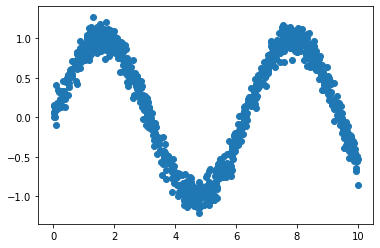

In [27]:
import matplotlib.pyplot as plt

X = 10 * np.random.rand(1000, 1)
y = np.sin(X) + 0.1 * np.random.randn(1000, 1)

plt.scatter(X, y)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn_params = {'n_neighbors': [1, 2, 3, 4, 5] +list(range(50, 100, 10))}
grid_knn = GridSearchCV(knn, knn_params, cv = 5, n_jobs = -1)
grid_knn.fit(X, y)
grid_knn.best_estimator_

KNeighborsRegressor()

In [40]:
X_test = np.random.rand(10) * 10
y_predict = grid_knn.predict(X_test.reshape(-1, 1))

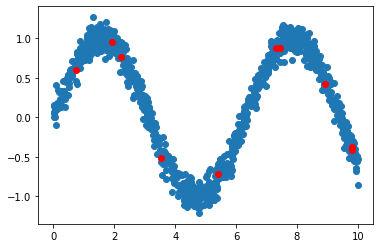

In [41]:
plt.scatter(X, y)
plt.scatter(X_test, y_predict, c='r')

## Понижение размерности

Алгоритм подбирает линейное преобразование, чтобы напрямую максимизировать стохастическую  оценку k-ближайших соседей (KNN) с исключением одного на обучающем наборе. Он также может генерировать низкоразмерную линейную проекцию данных, которую можно использовать для визуализации данных и быстрой классификации.

In [42]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.7, random_state=42)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

print(nca_pipe.score(X_test, y_test))


0.9619047619047619
